## Agentic Frameworks - LangGraph

### Need for Agentic Frameworks
Agentic frameworks are becoming increasingly important in the field of AI and automation. These frameworks enable systems to take initiative, make decisions, and exert control over their actions and outcomes with minimal human intervention. 
### Key elements of Agentinc workflows
* **Task Decomposition**: Breaking down complex tasks into manageable sub-tasks.
* **Task Planning**: Strategically organizing tasks to achieve specific goals.
* **Agent Recruitment**: Automatically recruit required agents and their personas for the task in hand
* **Agent Coordination**: Ensuring multiple agents work together seamlessly.
* **Ability to Use External Tools/Functions**: Integrating external resources to enhance capabilities.
* **Contextual Memory**: Retaining and utilizing context for better decision-making.
* **LLM Agnostic**: Being compatible with various large language models.
* **Optimizations/Reflections**: Continuously improving through feedback and self-assessment.
* **Human-In-The-Loop**: Incorporate human feedback and control
* **Guard-railing**: Enforce fair, ethical, safe practices and ensure data privacy rules
### Prominant Agentic Frameworks
* LangGraph
* Autogen
* CrewAI
* OpenAI
### Which LLM to chose for an Agent

LLM that we chose for a given task has to have few capabilities built in, here are few critical ones:
* Function/Tool calling ability
* Structured output
* Sufficient context window
* Tunable temperature



Let's make this a bit interesting, Let me ask LLM about my dog Monk
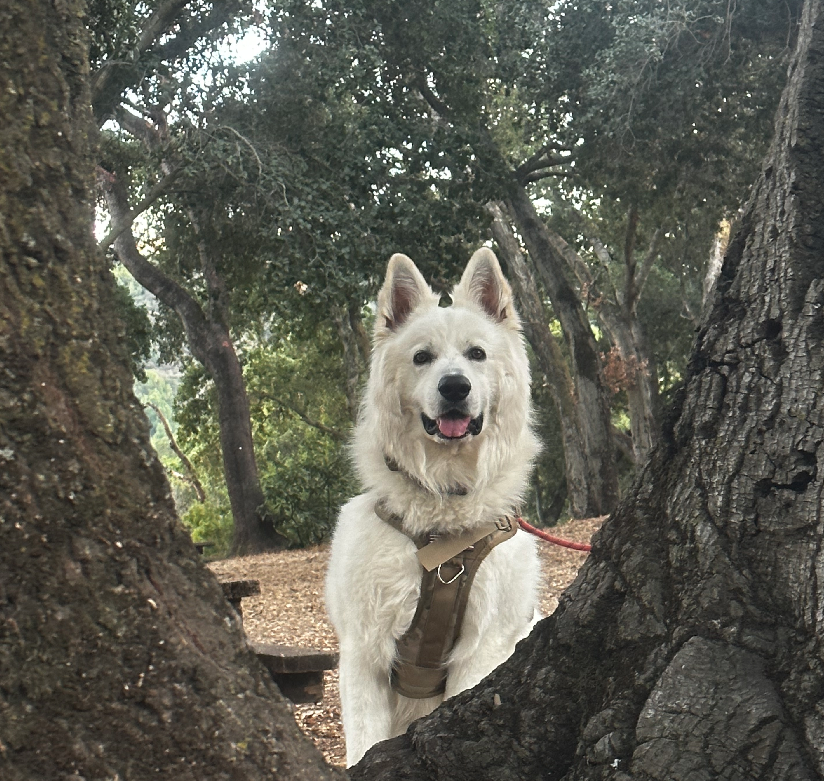

In [1]:
from dotenv import load_dotenv
import os,getpass

load_dotenv()
def _set_if_undefined(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"Please provide your {var}")
_set_if_undefined("OPENAI_API_KEY")

In [2]:
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(temperature=0, model_name="gpt-4o")
llm.invoke("How old Monk Avvari would be by year 2030")

AIMessage(content="I'm sorry, but I don't have any information on a person named Monk Avvari. If you can provide more context or details, I might be able to help you better.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 35, 'prompt_tokens': 19, 'total_tokens': 54, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_e5e4913e83', 'finish_reason': 'stop', 'logprobs': None}, id='run-60447d3b-c997-46ff-8926-9c89388eb116-0', usage_metadata={'input_tokens': 19, 'output_tokens': 35, 'total_tokens': 54})

Obviously LLM would not know about Monk, To Answer the above question, 
* The LLM first need to know the context on Monk Avvari 
* Extract the details of when Monk born from given context
* And from current date, it needs to calculate his age
* Then LLM needs to perform some operations of either add or subtract to get his age on 2030
* Produce final answer

## Let's build a simple LanGraph [ReAct](https://react-lm.github.io/) workflow 
* We will use a small write up on Monk
* Create embeddings and store in a vectorDB (Chroma)
* Build a simple RAG which can retrive details from vectorDB when LLM does not know the context
* Create custom tools/functions do math operations (add,subtract,multiply)
* Bind the tools to LLM

Then we will create the workflow of agent that can:
* Receive user question
* Calling RAG for missing context
* Call the tools to do simple math.
* provide eithr tool or RAG outcome back to agent.

With that LLM will be capable of producing final answer.

In [3]:
from ragagent.utils.create import createWorkflow

workflow=createWorkflow().getGraph()
graph = workflow.compile()

********* /home/radmad/langgraph
++++++++ ['testGraph.ipynb', '.gitignore', 'ragagent', 'README.md', 'langgraph.json', 'monk.txt', '.venv', '.git', 'requirements.txt', '.env']


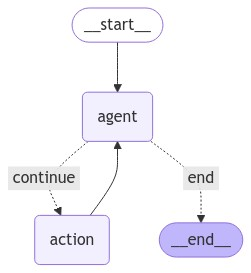

In [4]:
from IPython.display import Image, display
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

In [10]:
from langchain_core.messages import HumanMessage
messages = [HumanMessage(content="Add 3 and 4.")]
outmsg = graph.invoke({"messages": messages})
for m in outmsg['messages']:
    m.pretty_print()

================================ Human Message =================================

Add 3 and 4.
================================== Ai Message ==================================
Tool Calls:
  add (call_FTgX9eUv010ZdmQ03OsQ2FEs)
 Call ID: call_FTgX9eUv010ZdmQ03OsQ2FEs
  Args:
    a: 3
    b: 4
================================= Tool Message =================================
Name: add

7
================================== Ai Message ==================================

The sum of 3 and 4 is 7.


In [11]:
from langchain_core.messages import HumanMessage
messages = [HumanMessage(content="Add 3 and 4. Subtract 2 from that")]
outmsg = graph.invoke({"messages": messages})
for m in outmsg['messages']:
    m.pretty_print()

================================ Human Message =================================

Add 3 and 4. Subtract 2 from that
================================== Ai Message ==================================
Tool Calls:
  add (call_BB4TmuZKEsIKYWTuaDOaSKYJ)
 Call ID: call_BB4TmuZKEsIKYWTuaDOaSKYJ
  Args:
    a: 3
    b: 4
  subtract (call_Rqg0sPzPgCkTcaSULUqN8qeP)
 Call ID: call_Rqg0sPzPgCkTcaSULUqN8qeP
  Args:
    a: 7
    b: 2
================================= Tool Message =================================
Name: add

7
================================= Tool Message =================================
Name: subtract

5
================================== Ai Message ==================================

The result of adding 3 and 4 is 7. Subtracting 2 from that gives you 5.


In [12]:
from langchain_core.messages import HumanMessage
messages = [HumanMessage(content="Who is Monk Avvari")]
outmsg = graph.invoke({"messages": messages})
for m in outmsg['messages']:
    m.pretty_print()

================================ Human Message =================================

Who is Monk Avvari
================================== Ai Message ==================================
Tool Calls:
  RAG (call_4Wrl3TkXorQlmnBLgFwK5UBp)
 Call ID: call_4Wrl3TkXorQlmnBLgFwK5UBp
  Args:
    query: Monk Avvari
================================= Tool Message =================================
Name: RAG

### Monk Avvari's Achievements
Born on June 12th, 2021, Monk Avvari has made a name for himself through his exceptional abilities and contributions to the breed. His training and performance in various canine sports and working roles have showcased the versatility and intelligence of the Swiss White Shepherd. Monk Avvari's friendly demeanor and loyalty have also made him a beloved family pet and ambassador for the breed.

### Conclusion
Monk Avvari exemplifies the best qualities of the Swiss White Shepherd breed. His intelligence, friendly nature, and versatility make him a standout representative 

In [13]:
from langchain_core.messages import HumanMessage
messages = [HumanMessage(content="How old Monk Avvari would be by year 2030")]
outmsg = graph.invoke({"messages": messages})
for m in outmsg['messages']:
    m.pretty_print()

================================ Human Message =================================

How old Monk Avvari would be by year 2030
================================== Ai Message ==================================
Tool Calls:
  RAG (call_qnAa5CMpYrIfs2Wwn9Fku4E8)
 Call ID: call_qnAa5CMpYrIfs2Wwn9Fku4E8
  Args:
    query: Monk Avvari birth year
================================= Tool Message =================================
Name: RAG

### Monk Avvari's Achievements
Born on June 12th, 2021, Monk Avvari has made a name for himself through his exceptional abilities and contributions to the breed. His training and performance in various canine sports and working roles have showcased the versatility and intelligence of the Swiss White Shepherd. Monk Avvari's friendly demeanor and loyalty have also made him a beloved family pet and ambassador for the breed.

## Monk Avvari: The Swiss White Shepherd

### Introduction
Monk Avvari is a notable Swiss White Shepherd, a breed known for its striking white co

## Let's deploy the Graph and get API access to the graph

LangGraph cloud deployment requires you follow this directory structure:

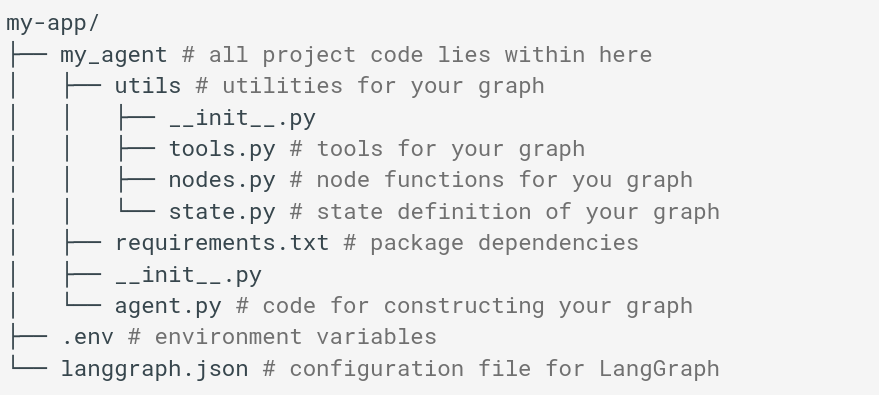

And also it has to be in a GIT repo :) hope this will change pretty soon
Once you have it you can deploy using langsmith($$)

Here we are deploying locally. For local deployments you need to :
1. You should have Docker running 
2. pip install langraph-cli
2. langraph up

With that you should be able to access API endpoint(http://localhost:8123) either from postman, Javascript or python.

In [ ]:
## Using SDK

In [16]:
from langgraph_sdk import get_client

In [17]:
URL = "http://localhost:8123"
client = get_client(url=URL)

# Search all hosted graphs
my_assist = await client.assistants.search()
print(my_assist)

[{'assistant_id': 'fe096781-5601-53d2-b2f6-0d3403f7e9ca', 'graph_id': 'agent', 'created_at': '2024-10-01T21:10:59.292871+00:00', 'updated_at': '2024-10-01T21:10:59.292871+00:00', 'config': {}, 'metadata': {'created_by': 'system'}, 'version': 1, 'name': 'agent'}]


In [18]:
from IPython.display import Image, display
from langgraph.graph.graph import CompiledGraph
import pprint
pp = pprint.PrettyPrinter(indent=2)
graph=await client.assistants.get_graph(my_assist[0]['assistant_id'],xray=True)
pp.pprint(graph)

{ 'edges': [ {'source': '__start__', 'target': 'agent'},
             {'source': 'action', 'target': 'agent'},
             { 'conditional': True,
               'data': 'continue',
               'source': 'agent',
               'target': 'action'},
             { 'conditional': True,
               'data': 'end',
               'source': 'agent',
               'target': '__end__'}],
  'nodes': [ {'data': '__start__', 'id': '__start__', 'type': 'schema'},
             { 'data': { 'id': [ 'langgraph',
                                 'utils',
                                 'runnable',
                                 'RunnableCallable'],
                         'name': 'agent'},
               'id': 'agent',
               'type': 'runnable'},
             { 'data': { 'id': [ 'langgraph',
                                 'prebuilt',
                                 'tool_node',
                                 'ToolNode'],
                         'name': 'action'},
              

In [19]:
# Create a thread
thread = await client.threads.create()
print(thread)

{'thread_id': 'f31285cd-4aea-4493-a3f7-bf829c8a4dfa', 'created_at': '2024-10-03T21:10:03.143325+00:00', 'updated_at': '2024-10-03T21:10:03.143325+00:00', 'metadata': {}, 'status': 'idle', 'config': {}, 'values': None}


In [24]:
from langchain_core.messages import HumanMessage

# Input
input = {"messages": [HumanMessage(content="How old Monk Avvari would be by year 2030")]}

# Stream
result=await client.runs.wait(
        thread['thread_id'],
        assistant_id=my_assist[0]['assistant_id'],
        input=input,
        config={"configurable": {"model_name": "openai"}},
    )
print(result['messages'][-1]['content'])

Monk Avvari would be 9 years old by the year 2030.


In [21]:
import pprint

pp = pprint.PrettyPrinter(indent=2)
thread_state = await client.threads.get_state(
                thread_id=thread['thread_id'],
            )
for msg in thread_state['values']['messages']:
    if 'tool_calls' in msg['additional_kwargs']:
        pp.pprint(msg['additional_kwargs']['tool_calls'])

[ { 'function': { 'arguments': '{"query":"Monk Avvari birth year"}',
                  'name': 'RAG'},
    'id': 'call_KN4V9tKrM6rSTN3v6L7MgwQ3',
    'type': 'function'}]
[ { 'function': {'arguments': '{"a":2030,"b":2021}', 'name': 'subtract'},
    'id': 'call_uF14Nzy6z4S2Q6QPdVzWybUd',
    'type': 'function'}]


In [ ]:
## Using API 

In [43]:
import requests
import json

url = f"{URL}/assistants/search/"

payload = json.dumps({
  "metadata": {},
  "limit": 10,
  "offset": 0
})
headers = {
  'Content-Type': 'application/json'
}

assistants = requests.request("POST", url, headers=headers, data=payload)

print(assistants.json()[0]['assistant_id'])


fe096781-5601-53d2-b2f6-0d3403f7e9ca


In [50]:
import requests
import json

url = "http://localhost:8123/runs/wait"

payload = json.dumps({
  "input": {
    "messages": "How old he would be Monk Avvari in 2026"
  },
  "assistant_id": assistants.json()[0]['assistant_id'],
  "config": {
    "configurable": {
      "model_name": "openai"
    }
  }
})
headers = {
  'Content-Type': 'application/json',
  'x-api-key': os.environ.get("OPENAI_API_KEY"),
  'OPENAI_API_KEY': os.environ.get("OPENAI_API_KEY")
}

response = requests.request("POST", url, headers=headers, data=payload)



In [51]:
response.json()

{'messages': [{'content': 'How old he would be Monk Avvari in 2026',
   'additional_kwargs': {},
   'response_metadata': {},
   'type': 'human',
   'name': None,
   'id': '07cc8a72-ee6d-4e63-9711-ba455ac5b2a7',
   'example': False},
  {'content': '',
   'additional_kwargs': {'tool_calls': [{'id': 'call_QISidlsDu6OCXYJ4MsjeuTSQ',
      'function': {'arguments': '{"query":"Monk Avvari birth year"}',
       'name': 'RAG'},
      'type': 'function'}],
    'refusal': None},
   'response_metadata': {'token_usage': {'completion_tokens': 19,
     'prompt_tokens': 167,
     'total_tokens': 186,
     'completion_tokens_details': {'audio_tokens': None,
      'reasoning_tokens': 0},
     'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}},
    'model_name': 'gpt-4o-2024-08-06',
    'system_fingerprint': 'fp_5050236cbd',
    'finish_reason': 'tool_calls',
    'logprobs': None},
   'type': 'ai',
   'name': None,
   'id': 'run-55e59169-d570-45b9-a5a0-6f655653f239-0',
   'example': Fa